In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Longjing = df['SiteName'].isin(['龍井']) #找龍井測站
df[Longjing]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460346,461641,龍井,臺中市,58.0,懸浮微粒,普通,1.5,0.1,NaN,25,...,66.0,10.0,3.1,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460435,461730,龍井,臺中市,54.0,懸浮微粒,普通,1.1,0.1,NaN,24,...,60.0,10.0,2.3,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460448,461743,龍井,臺中市,51.0,懸浮微粒,普通,0.7,0.1,NaN,25,...,56.0,9.0,1.1,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460537,461832,龍井,臺中市,46.0,懸浮微粒,良好,0.7,0.1,NaN,26,...,50.0,9.0,0.2,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460689,461984,龍井,臺中市,43.0,懸浮微粒,良好,2.1,0.1,NaN,28,...,46.0,8.0,2.6,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460791,462086,龍井,臺中市,40.0,懸浮微粒,良好,2.0,0.1,NaN,28,...,43.0,8.0,1.2,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460880,462175,龍井,臺中市,37.0,懸浮微粒,良好,2.1,0.1,NaN,30,...,40.0,7.0,2.9,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461197,462492,龍井,臺中市,71.0,懸浮微粒,普通,0.4,0.1,NaN,38,...,84.0,12.0,2.9,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461286,462581,龍井,臺中市,81.0,懸浮微粒,普通,0.7,0.1,NaN,41,...,98.0,13.0,3.0,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461375,462670,龍井,臺中市,91.0,懸浮微粒,普通,0.4,0.1,NaN,43,...,112.0,13.0,3.2,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
Longjing = df['SiteName'].isin(['龍井']) #找龍井測站
Longjing=df[Longjing].fillna(method='ffill').drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column

Longjing

,SO2,CO,O3,PM10,PM25,NO2
0,1.5,0.1,25,66.0,10.0,3.1
1,1.1,0.1,24,60.0,10.0,2.3
2,0.7,0.1,25,56.0,9.0,1.1
3,0.7,0.1,26,50.0,9.0,0.2
4,2.1,0.1,28,46.0,8.0,2.6
5,2.0,0.1,28,43.0,8.0,1.2
6,2.1,0.1,30,40.0,7.0,2.9
7,0.4,0.1,38,84.0,12.0,2.9
8,0.7,0.1,41,98.0,13.0,3.0
9,0.4,0.1,43,112.0,13.0,3.2


In [5]:
bbb=Longjing['PM10']>50
#Longjing['PM10']=Longjing['PM10'].astype("int")
#Longjing['PM10']=Longjing['PM10'].apply(lambda x: [y if y <= 200 else np.nan for y in x])
Longjing['PM10'].replace(2,np.nan, inplace=True)


In [6]:
Longjing.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
 
Longjing

,SO2,CO,O3,PM10,PM25,NO2
0,1.5,0.10,25.0,66.0,10.0,3.1
1,1.1,0.10,24.0,60.0,10.0,2.3
2,0.7,0.10,25.0,56.0,9.0,1.1
3,0.7,0.10,26.0,50.0,9.0,0.2
4,2.1,0.10,28.0,46.0,8.0,2.6
5,2.0,0.10,28.0,43.0,8.0,1.2
6,2.1,0.10,30.0,40.0,7.0,2.9
7,0.4,0.10,38.0,84.0,12.0,2.9
8,0.7,0.10,41.0,98.0,13.0,3.0
9,0.4,0.10,43.0,112.0,13.0,3.2


In [7]:
aaa=Longjing['PM10']>200
Longjing[aaa]

,SO2,CO,O3,PM10,PM25,NO2


In [8]:
Longjing.fillna(method='ffill', inplace=True) #以前面數字來取代0值

Longjing

,SO2,CO,O3,PM10,PM25,NO2
0,1.5,0.10,25.0,66.0,10.0,3.1
1,1.1,0.10,24.0,60.0,10.0,2.3
2,0.7,0.10,25.0,56.0,9.0,1.1
3,0.7,0.10,26.0,50.0,9.0,0.2
4,2.1,0.10,28.0,46.0,8.0,2.6
5,2.0,0.10,28.0,43.0,8.0,1.2
6,2.1,0.10,30.0,40.0,7.0,2.9
7,0.4,0.10,38.0,84.0,12.0,2.9
8,0.7,0.10,41.0,98.0,13.0,3.0
9,0.4,0.10,43.0,112.0,13.0,3.2


In [9]:
Longjing['pr']=''
#Longjing.drop([ 0,1],inplace=True)
#Longjing.reset_index(drop=True,inplace=True)
#000

Longjing.to_csv('Longjingpollution.csv')

Longjing

,SO2,CO,O3,PM10,PM25,NO2,pr
0,1.5,0.10,25.0,66.0,10.0,3.1,
1,1.1,0.10,24.0,60.0,10.0,2.3,
2,0.7,0.10,25.0,56.0,9.0,1.1,
3,0.7,0.10,26.0,50.0,9.0,0.2,
4,2.1,0.10,28.0,46.0,8.0,2.6,
5,2.0,0.10,28.0,43.0,8.0,1.2,
6,2.1,0.10,30.0,40.0,7.0,2.9,
7,0.4,0.10,38.0,84.0,12.0,2.9,
8,0.7,0.10,41.0,98.0,13.0,3.0,
9,0.4,0.10,43.0,112.0,13.0,3.2,


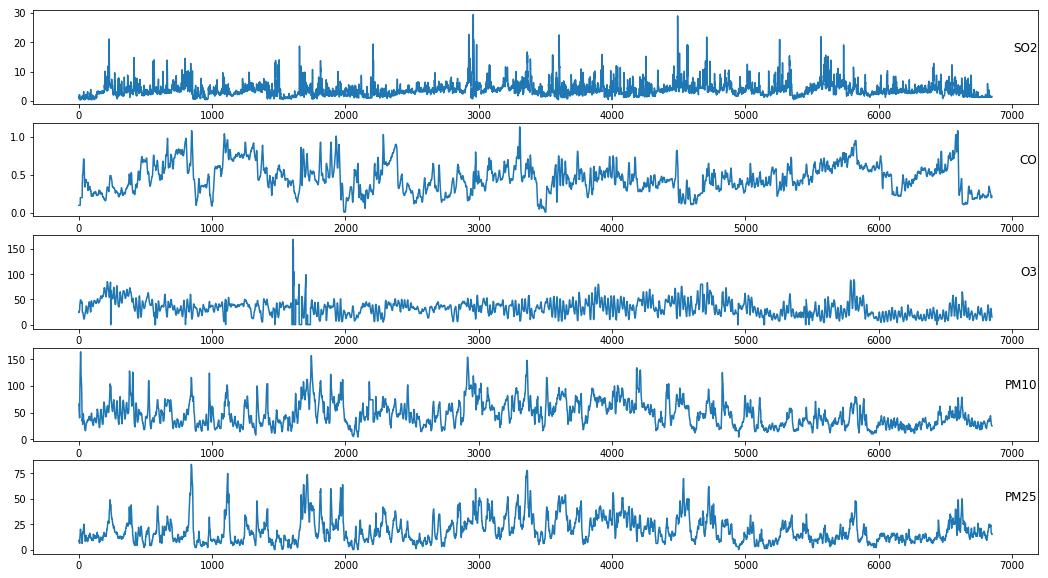

In [10]:
# load dataset
dataset =pd.read_csv('Longjingpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-0.960307,-1.913264,-0.479355,0.764043,-0.812584,-0.993690,9.0
1,-1.128040,-1.913264,-0.545056,0.514021,-0.812584,-1.098118,9.0
2,-1.295774,-1.913264,-0.479355,0.347340,-0.890944,-1.254762,8.0
3,-1.295774,-1.913264,-0.413654,0.097318,-0.890944,-1.372244,8.0
4,-0.708706,-1.913264,-0.282252,-0.069363,-0.969304,-1.058958,7.0
5,-0.750640,-1.913264,-0.282252,-0.194374,-0.969304,-1.241708,7.0
6,-0.708706,-1.913264,-0.150850,-0.319385,-1.047665,-1.019797,6.0
7,-1.421574,-1.913264,0.374757,1.514109,-0.655864,-1.019797,11.0
8,-1.295774,-1.913264,0.571860,2.097494,-0.577504,-1.006743,12.0
9,-1.421574,-1.913264,0.703262,2.680879,-0.577504,-0.980636,12.0


In [12]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 



In [13]:
#將次序打亂 資料亂序 將資料打散，而非照日期排序
#def shuffle(X,Y):
#    np.random.seed(10)
#    randomList = np.arange(X.shape[0])
#    np.random.shuffle(randomList)
#    return X[randomList], Y[randomList]

In [14]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

Instructions for updating:
Colocations handled automatically by placer.


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if sys.path[0] == '':
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6))`
  if sys.path[0] == '':


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

Epoch 58/500
5534/5534 [==============================] - 1s 234us/step - loss: 36.6806 - val_loss: 25.5718
Epoch 59/500
5534/5534 [==============================] - 1s 252us/step - loss: 35.4124 - val_loss: 25.8789
Epoch 60/500
5534/5534 [==============================] - 1s 265us/step - loss: 34.4438 - val_loss: 25.2973
Epoch 61/500
5534/5534 [==============================] - 1s 263us/step - loss: 34.7830 - val_loss: 25.6632
Epoch 62/500
5534/5534 [==============================] - 1s 258us/step - loss: 35.2756 - val_loss: 24.8318
Epoch 63/500
5534/5534 [==============================] - 1s 252us/step - loss: 34.8566 - val_loss: 25.4338
Epoch 64/500
5534/5534 [==============================] - 1s 251us/step - loss: 34.7115 - val_loss: 25.0590
Epoch 65/500
5534/5534 [==============================] - 2s 271us/step - loss: 34.3455 - val_loss: 24.8783
Epoch 66/500
5534/5534 [==============================] - 2s 273us/step - loss: 34.9317 - val_loss: 25.2942
Epoch 67/500
5534/5534 [====

5534/5534 [==============================] - 1s 268us/step - loss: 26.5062 - val_loss: 20.2748
Epoch 134/500
5534/5534 [==============================] - 1s 248us/step - loss: 25.6270 - val_loss: 19.9546
Epoch 135/500
5534/5534 [==============================] - 1s 258us/step - loss: 26.8620 - val_loss: 19.9174
Epoch 136/500
5534/5534 [==============================] - 1s 270us/step - loss: 26.5475 - val_loss: 19.6630
Epoch 137/500
5534/5534 [==============================] - 1s 259us/step - loss: 25.2685 - val_loss: 19.4437
Epoch 138/500
5534/5534 [==============================] - 1s 259us/step - loss: 26.0253 - val_loss: 19.2091
Epoch 139/500
5534/5534 [==============================] - 1s 238us/step - loss: 25.9049 - val_loss: 19.1205
Epoch 140/500
5534/5534 [==============================] - 2s 274us/step - loss: 25.6620 - val_loss: 19.5311
Epoch 141/500
5534/5534 [==============================] - 1s 247us/step - loss: 25.5432 - val_loss: 19.4775
Epoch 142/500
5534/5534 [========

5534/5534 [==============================] - 1s 260us/step - loss: 21.2271 - val_loss: 15.3328
Epoch 209/500
5534/5534 [==============================] - 1s 257us/step - loss: 20.6467 - val_loss: 15.1431
Epoch 210/500
5534/5534 [==============================] - 1s 264us/step - loss: 20.6301 - val_loss: 14.8096
Epoch 211/500
5534/5534 [==============================] - 1s 250us/step - loss: 21.6364 - val_loss: 14.8530
Epoch 212/500
5534/5534 [==============================] - 1s 254us/step - loss: 20.1364 - val_loss: 15.2578
Epoch 213/500
5534/5534 [==============================] - 1s 259us/step - loss: 20.8729 - val_loss: 16.1689
Epoch 214/500
5534/5534 [==============================] - 1s 253us/step - loss: 20.4441 - val_loss: 15.3822
Epoch 215/500
5534/5534 [==============================] - 1s 245us/step - loss: 20.7074 - val_loss: 15.1000
Epoch 216/500
5534/5534 [==============================] - 1s 254us/step - loss: 19.9706 - val_loss: 15.2027
Epoch 217/500
5534/5534 [========

5534/5534 [==============================] - 1s 240us/step - loss: 18.6709 - val_loss: 13.0922
Epoch 284/500
5534/5534 [==============================] - 1s 241us/step - loss: 18.1110 - val_loss: 13.4601
Epoch 285/500
5534/5534 [==============================] - 1s 252us/step - loss: 18.6444 - val_loss: 13.6595
Epoch 286/500
5534/5534 [==============================] - 1s 254us/step - loss: 18.1323 - val_loss: 13.1327
Epoch 287/500
5534/5534 [==============================] - 1s 253us/step - loss: 17.9985 - val_loss: 13.2813
Epoch 288/500
5534/5534 [==============================] - 1s 265us/step - loss: 18.1067 - val_loss: 13.6207
Epoch 289/500
5534/5534 [==============================] - 1s 241us/step - loss: 18.3024 - val_loss: 13.0676
Epoch 290/500
5534/5534 [==============================] - 1s 256us/step - loss: 17.8875 - val_loss: 13.1992
Epoch 291/500
5534/5534 [==============================] - 1s 238us/step - loss: 18.3945 - val_loss: 13.0829
Epoch 292/500
5534/5534 [========

5534/5534 [==============================] - 1s 246us/step - loss: 16.9751 - val_loss: 11.6333
Epoch 359/500
5534/5534 [==============================] - 1s 251us/step - loss: 16.3001 - val_loss: 11.7002
Epoch 360/500
5534/5534 [==============================] - 1s 252us/step - loss: 16.5756 - val_loss: 11.8522
Epoch 361/500
5534/5534 [==============================] - 1s 255us/step - loss: 16.6970 - val_loss: 11.5847
Epoch 362/500
5534/5534 [==============================] - 1s 252us/step - loss: 16.8055 - val_loss: 11.3820
Epoch 363/500
5534/5534 [==============================] - 1s 246us/step - loss: 16.9812 - val_loss: 11.9267
Epoch 364/500
5534/5534 [==============================] - 1s 247us/step - loss: 17.1472 - val_loss: 11.7826
Epoch 365/500
5534/5534 [==============================] - 1s 253us/step - loss: 17.4252 - val_loss: 12.0746
Epoch 366/500
5534/5534 [==============================] - 1s 261us/step - loss: 17.4740 - val_loss: 11.6081
Epoch 367/500
5534/5534 [========

5534/5534 [==============================] - 1s 205us/step - loss: 15.8545 - val_loss: 10.9995
Epoch 434/500
5534/5534 [==============================] - 1s 220us/step - loss: 15.0274 - val_loss: 10.8565
Epoch 435/500
5534/5534 [==============================] - 1s 223us/step - loss: 16.0308 - val_loss: 10.8905
Epoch 436/500
5534/5534 [==============================] - 1s 226us/step - loss: 16.0432 - val_loss: 10.8878
Epoch 437/500
5534/5534 [==============================] - 1s 210us/step - loss: 15.8437 - val_loss: 10.6967
Epoch 438/500
5534/5534 [==============================] - 1s 219us/step - loss: 15.0971 - val_loss: 10.9333
Epoch 439/500
5534/5534 [==============================] - 1s 214us/step - loss: 15.7450 - val_loss: 10.2443
Epoch 440/500
5534/5534 [==============================] - 1s 233us/step - loss: 16.1582 - val_loss: 10.4511
Epoch 441/500
5534/5534 [==============================] - 1s 222us/step - loss: 16.2404 - val_loss: 10.5630
Epoch 442/500
5534/5534 [========

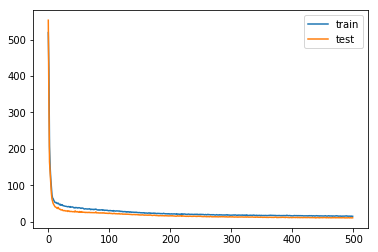

In [15]:
#model
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Longjingmodel.h5')
del model

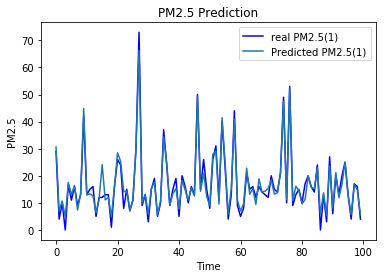

Train 0.6929582045861116
Validation 0.5900439238653001
4.710388233388805e+34
The R2 score on the Test set is:	0.945
Train Score: 2.58 RMSE
Test Score: 2.99 RMSE
The MSE   on the Test set is: 8.940570779420792
The RMSE  on the Test set is: 2.9900787246192686
The MAE   on the Test set is: 2.1836681076732796
The MAPE  on the Test set is: inf
The SMAPE on the Test set is: 0.02376960331432103


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


In [16]:
#讀取model3
model = load_model('Longjingmodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

